# Study the condition for the Hohnenberg-Kohn Mapping in a 1nn (2nn) Transverse Ising model

## Case a) 1nn Transverse Ising Model

The Hamiltonian is 

$H=J\sum_i x_i x_{i+1} + \sum_i h_i z_i   \; \; \text{with}  \; \; J<0 \; \; \text{and}  \; \; h_i \in [0,h_{max}]$

We have to check if the $\det{M_{ij}}\ne 0$ with $M_{ij}=\langle z_i z_j \rangle - \langle z_i \rangle \langle z_j \rangle$ for each realization of the Disorder

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils_sparse_diag import transverse_ising_sparse_h_k_mapping_check,transverse_ising_sparse_h_k_mapping_check_lanczos_method
from src.utils_nambu_system import parallel_nambu_correlation_ising_model
import os

#limit the usage of cpu by quspin
os.environ[
    "KMP_DUPLICATE_LIB_OK"
] = "True"  # uncomment this line if omp error occurs on OSX for python 3
os.environ["OMP_NUM_THREADS"] = str(
    3
)  # set number of OpenMP threads to run in parallel
os.environ["MKL_NUM_THREADS"] = str(3)  # set number of MKL threads to run in parallel

#### Data

In [3]:

h_max=np.linspace(np.e-0.5,np.e+0.5,11)
ndata=100
nbatch=5
ls=[16,32,64]
j=-1

zs_l=[]
zzs_l=[]
for l in ls:
    zs={}
    zzs={}
    for h in h_max:
        hs=np.random.uniform(0.,h,(ndata,l))
        _,zz,z=parallel_nambu_correlation_ising_model(nbatch=nbatch,l=l,j_coupling=j,hs=hs,name_file='None',device='cpu',pbc=True)
        #z,zz=transverse_ising_sparse_h_k_mapping_check(h_max=h,hs=hs,n_dataset=ndata,l=l,j1=j,j2=j,pbc=True,z_2=False,file_name='none',check_2nn=False,eps_breaking=0.)
        print(zz.shape)
        zs[h]=z
        zzs[h]=zz
    zs_l.append(zs)
    zzs_l.append(zzs)

100%|██████████| 5/5 [00:01<00:00,  3.88it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:00<00:00,  5.75it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:00<00:00,  6.81it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:00<00:00,  5.65it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:00<00:00,  6.69it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:01<00:00,  2.98it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:00<00:00,  5.34it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:00<00:00,  7.06it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:00<00:00,  6.47it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:01<00:00,  4.37it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:02<00:00,  1.88it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:02<00:00,  2.49it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:02<00:00,  2.30it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:01<00:00,  4.62it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:01<00:00,  3.73it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:01<00:00,  3.02it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:01<00:00,  3.29it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:13<00:00,  2.72s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:12<00:00,  2.49s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:09<00:00,  1.80s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:10<00:00,  2.19s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:11<00:00,  2.35s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:15<00:00,  3.16s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:14<00:00,  2.97s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:17<00:00,  3.44s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:14<00:00,  2.95s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:15<00:00,  3.11s/it]


(100, 64, 64)


100%|██████████| 5/5 [00:20<00:00,  4.03s/it]

(100, 64, 64)


#### Analysis of the eigenvalues of $M_{ij}$

In [4]:
ml=[]
min_eighl=[]
av_eighl=[]
pb_lowl=[]
for i in range(len(ls)):
    m=[]
    min_eigh=[]
    av_eigh=[]
    pb_low=[]
    for h in h_max:
        mij=zzs_l[i][h]-zs_l[i][h][:,None,:]*zs_l[i][h][:,:,None]
        lambd,_=np.linalg.eig(mij)
        lambd=np.abs(lambd)
        av_eigh.append(np.average(np.min(lambd,axis=-1)))
        lambd=np.min(lambd,axis=-1)
        pr=lambd[lambd<0.05].shape[0]
        print(pr)
        pb_low.append(pr/ndata)
        m.append(mij)
        min_eigh.append(np.min(lambd))
    
    ml.append(m)
    min_eighl.append(min_eigh)
    av_eighl.append(av_eigh)
    pb_lowl.append(pb_low)

1
4
7
13
24
27
40
49
47
65
67
5
16
25
30
52
47
69
73
75
84
93
10
20
38
50
72
74
82
94
97
100
100


#### Plot

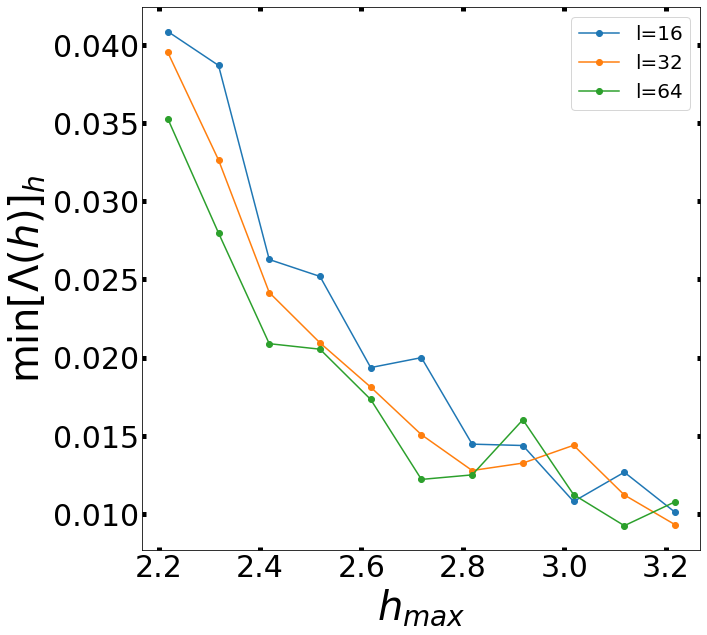

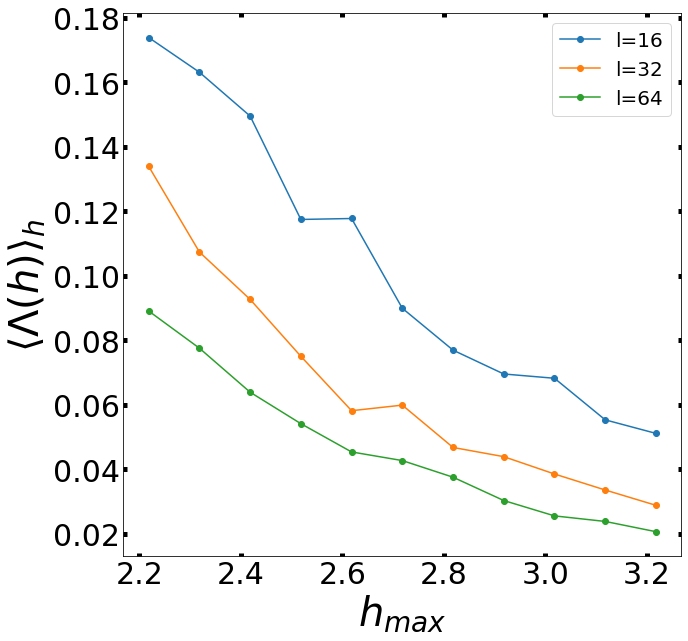

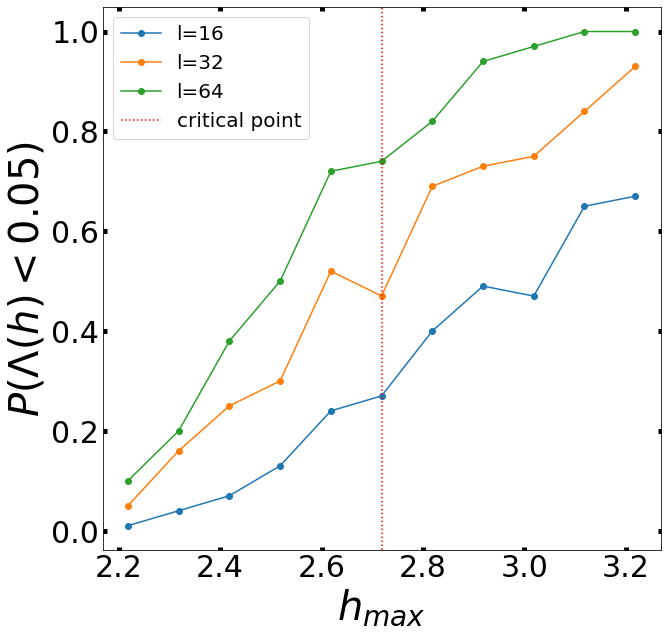

In [5]:
from cProfile import label


plt.figure(figsize=(10,10))
for i in range(len(ls)):
    plt.plot(h_max,min_eighl[i],marker='o',label=f'l={ls[i]}')
    plt.xlabel(r'$h_{max}$',fontsize=40)
    plt.ylabel(r'$\min[ \Lambda(h)]_{h}$',fontsize=40)
    plt.tick_params(
                top=True,
                right=True,
                labeltop=False,
                labelright=False,
                direction="in",
                labelsize=30,
                width=5,
            )
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
for i in range(len(ls)):
    plt.plot(h_max,av_eighl[i],marker='o',label=f'l={ls[i]}')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$\langle \Lambda(h)\rangle_{h}$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.legend(fontsize=20)
plt.show()
plt.figure(figsize=(10,10))
for i in range(len(ls)):
    plt.plot(h_max,pb_lowl[i],marker='o',label=f'l={ls[i]}')
plt.axvline(x=np.e,color='red',linestyle=':',label='critical point')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$P( \Lambda(h)<0.05)$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.legend(fontsize=20)
plt.show()

## Case b) 2nn Interaction 

The Hamiltonian is 

$ H=J \sum_i (x_i x_{i+1}+ x_i x_{i+2} )+\sum_i h_i z_i \; \; \text{with} \; \; J<0 $

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils_sparse_diag import transverse_ising_sparse_h_k_mapping_check,transverse_ising_sparse_h_k_mapping_check_lanczos_method
import os

#limit the usage of cpu by quspin
os.environ[
    "KMP_DUPLICATE_LIB_OK"
] = "True"  # uncomment this line if omp error occurs on OSX for python 3
os.environ["OMP_NUM_THREADS"] = str(
    3
)  # set number of OpenMP threads to run in parallel
os.environ["MKL_NUM_THREADS"] = str(3)  # set number of MKL threads to run in parallel

#### Data

In [4]:
h_max=[2*np.exp(1)-0.5,2*np.exp(1)-0.3,2*np.exp(1)-0.1,2*np.exp(1),2*np.exp(1)+0.1,2*np.exp(1)+0.3,2*np.exp(1)+0.5]
ndata=100
ls=[16,32,64]
j=-1
zs_l={}
zzs_l={}
for l in ls:
    zs={}
    zzs={}
    for h in h_max:
        data=np.load(f'data/dmrg_h_k_map_2nn/dataset_291122/h_k_check_2nn_{l}_l_{h}_h_{ndata}_n.npz')
        zs[h]=data['density']
        zzs[h]=data['correlation']
    zs_l[l]=zs
    zzs_l[l]=zzs
    

(100, 16, 16)


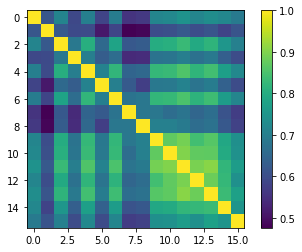

In [5]:
print(zzs_l[16][2*np.exp(1)].shape)
plt.imshow(zzs_l[16][2*np.exp(1)][0])
plt.colorbar()
plt.show()

#### Analysis of the eigenvalues of $M_{ij}$

In [6]:
ml=[]
min_eighl=[]
av_eighl=[]
pb_lowl=[]
for i in range(len(ls)):
    m=[]
    min_eigh=[]
    av_eigh=[]
    pb_low=[]
    for h in h_max:
        mij=zzs_l[ls[i]][h]-zs_l[ls[i]][h][:,None,:]*zs_l[ls[i]][h][:,:,None]
        lambd,_=np.linalg.eig(mij)
        lambd=np.abs(lambd)
        av_eigh.append(np.average(np.min(lambd,axis=-1)))
        lambd=np.min(lambd,axis=-1)
        pr=lambd[lambd<0.05].shape[0]
        print(pr)
        pb_low.append(pr/ndata)
        m.append(mij)
        min_eigh.append(np.min(lambd))
    
    ml.append(m)
    min_eighl.append(min_eigh)
    av_eighl.append(av_eigh)
    pb_lowl.append(pb_low)

0
0
0
1
0
1
0
0
0
0
1
2
3
3
0
0
0
0
0
4
11


#### Plot

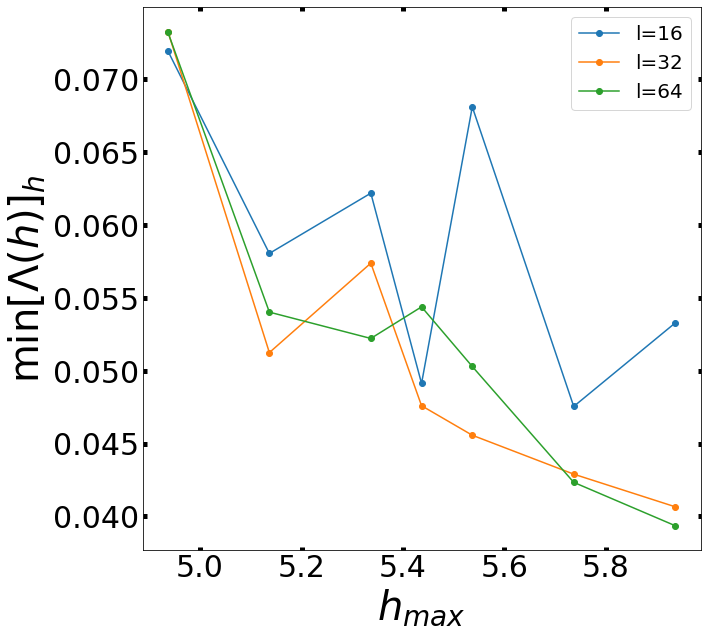

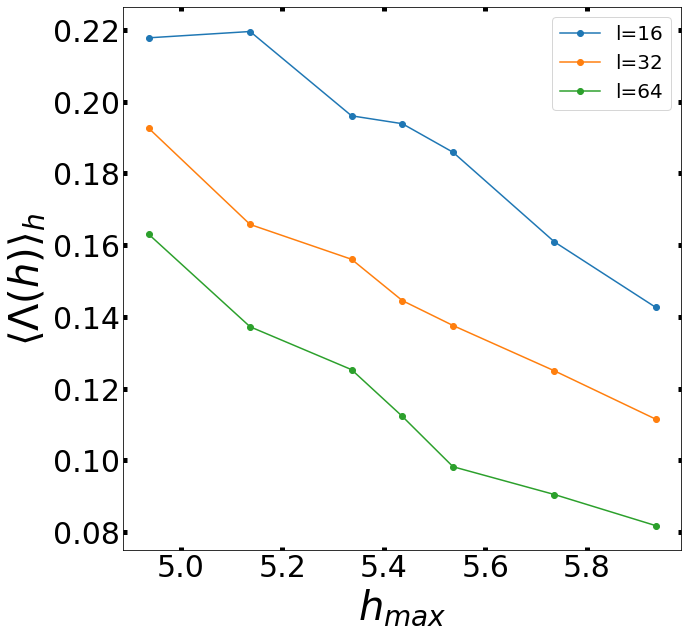

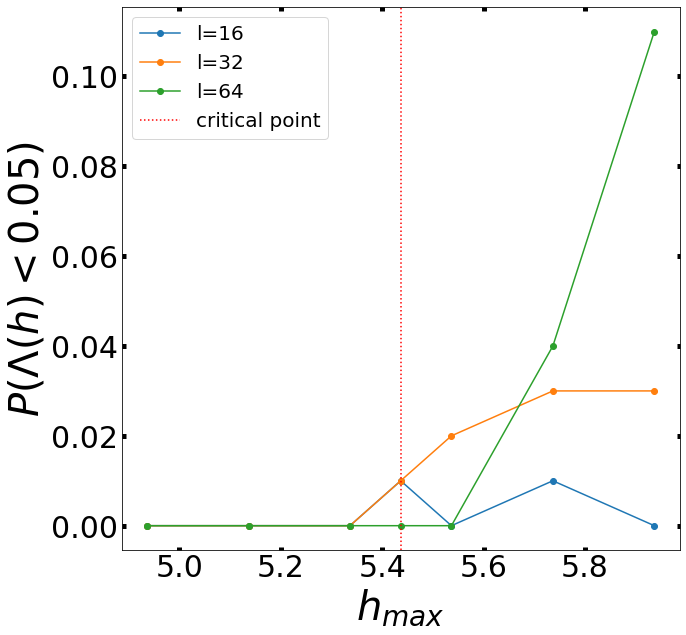

In [8]:

plt.figure(figsize=(10,10))
for i in range(len(ls)):
    plt.plot(h_max,min_eighl[i],marker='o',label=f'l={ls[i]}')
    plt.xlabel(r'$h_{max}$',fontsize=40)
    plt.ylabel(r'$\min[ \Lambda(h)]_{h}$',fontsize=40)
    plt.tick_params(
                top=True,
                right=True,
                labeltop=False,
                labelright=False,
                direction="in",
                labelsize=30,
                width=5,
            )
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
for i in range(len(ls)):
    plt.plot(h_max,av_eighl[i],marker='o',label=f'l={ls[i]}')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$\langle \Lambda(h)\rangle_{h}$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.legend(fontsize=20)
plt.show()
plt.figure(figsize=(10,10))
for i in range(len(ls)):
    plt.plot(h_max,pb_lowl[i],marker='o',label=f'l={ls[i]}')
plt.axvline(x=2*np.e,color='red',linestyle=':',label='critical point')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$P( \Lambda(h)<0.05)$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.legend(fontsize=20)
plt.show()

## Finite size scaling test for the 1nn case

In [18]:
h_max=np.e
ndata=100
nbatch=5
ls=[i*16 for i in range(1,9)]
j=-1

zs_l=[]
zzs_l=[]
for l in ls:
    zs={}
    zzs={}
    hs=np.random.uniform(0.,h_max,(ndata,l))
    _,zz,z=parallel_nambu_correlation_ising_model(nbatch=nbatch,l=l,j_coupling=j,hs=hs,name_file='None',device='cpu',pbc=True)
    #z,zz=transverse_ising_sparse_h_k_mapping_check(h_max=h,hs=hs,n_dataset=ndata,l=l,j1=j,j2=j,pbc=True,z_2=False,file_name='none',check_2nn=False,eps_breaking=0.)
    print(zz.shape)
    zs_l.append(z)
    zzs_l.append(zz)

100%|██████████| 5/5 [00:00<00:00, 55.83it/s]


(100, 16, 16)


100%|██████████| 5/5 [00:00<00:00, 12.28it/s]


(100, 32, 32)


100%|██████████| 5/5 [00:01<00:00,  4.07it/s]


(100, 48, 48)


 20%|██        | 1/5 [00:01<00:04,  1.04s/it]


KeyboardInterrupt: 

#### Compute $M_{ij}$

In [13]:
ml=[]
min_eighl=[]
av_eighl=[]
pb_lowl=[]
for i in range(len(ls)):
    mij=zzs_l[i]-zs_l[i][:,None,:]*zs_l[i][:,:,None]
    lambd,_=np.linalg.eig(mij)
    lambd=np.abs(lambd)
    av_eighl.append(np.average(np.min(lambd,axis=-1)))
    lambd=np.min(lambd,axis=-1)
    pr=lambd.copy()
    
    ml.append(mij)
    min_eighl.append(np.min(lambd))
    pb_lowl.append(pr)

#### Plots

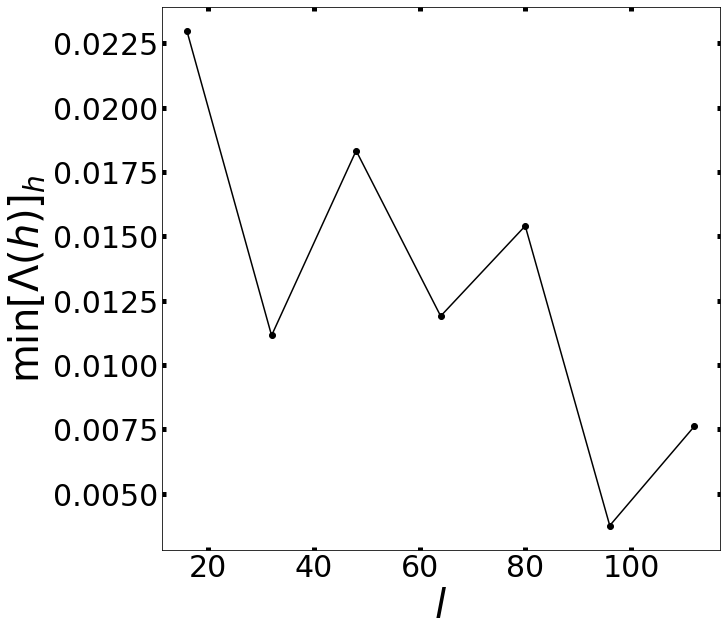

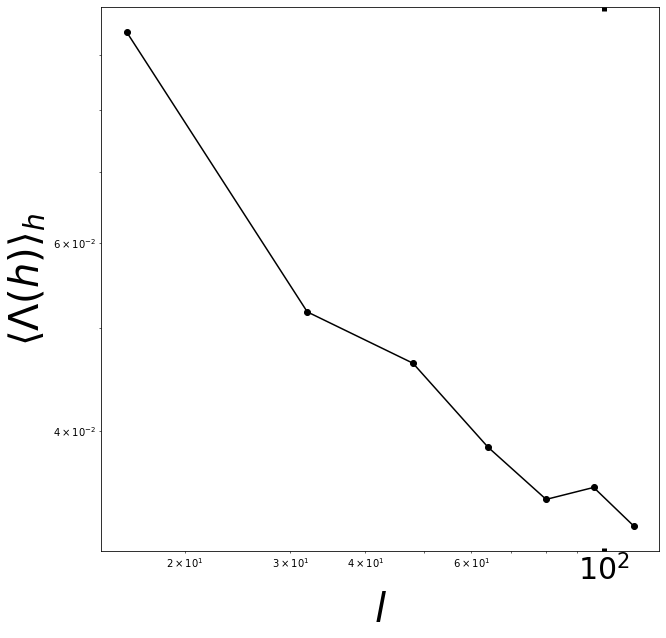

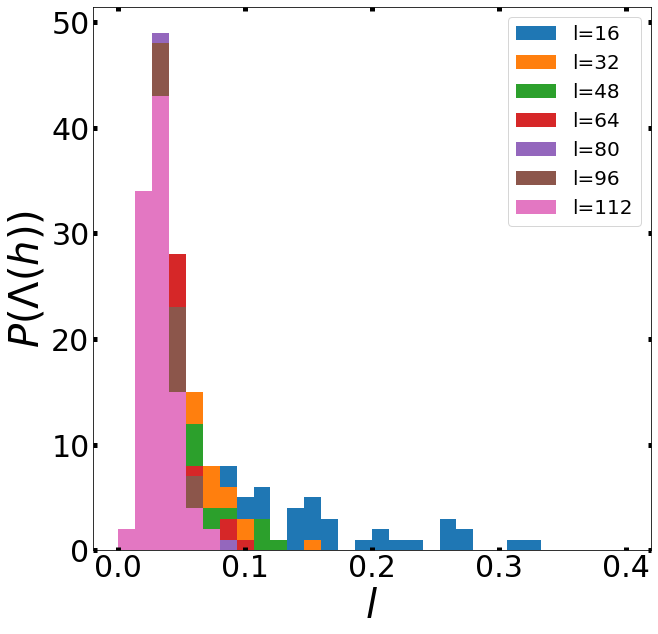

In [16]:
plt.figure(figsize=(10,10))
plt.plot(ls,min_eighl,color='black',marker='o')
plt.xlabel(r'$l$',fontsize=40)
plt.ylabel(r'$\min[ \Lambda(h)]_{h}$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.show()
plt.figure(figsize=(10,10))
plt.plot(ls,av_eighl,color='black',marker='o')
plt.xlabel(r'$l$',fontsize=40)
plt.ylabel(r'$\langle \Lambda(h)\rangle_{h}$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.loglog()
plt.show()


plt.figure(figsize=(10,10))
for i in range(len(ls)):
    plt.hist(pb_lowl[i],label=f'l={ls[i]}',bins=30,range=(0,0.4))
    plt.xlabel(r'$l$',fontsize=40)
    plt.ylabel(r'$P( \Lambda(h))$',fontsize=40)
    plt.tick_params(
                top=True,
                right=True,
                labeltop=False,
                labelright=False,
                direction="in",
                labelsize=30,
                width=5,
            )
    plt.legend(fontsize=20)
plt.show()